# Human Motion Database 51 (HMDB51)
### Download the dataset

In [ ]:
# Download HMDB51 data and splits from serre lab website
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar

--2024-04-17 19:07:01--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Resolving serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)... 128.148.254.114
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar [following]
--2024-04-17 19:07:01--  https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124008126 (2.0G)
Saving to: ‘hmdb51_org.rar’

hmdb51_org.rar      100%[===================>]   1.98G  36.5MB/s    in 56s     

2024-04-17 19:07:58 (36.0 MB/s) - ‘hmdb51_org.rar’ saved [2124008126/2124008126]

--2024-04-17 19:07:58--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar
R

# Extract and organize the data.

In [ ]:
! mkdir -p video_data test_train_splits
! unrar e test_train_splits.rar test_train_splits
! rm test_train_splits.rar
! unrar e hmdb51_org.rar
! rm hmdb51_org.rar
! mv *.rar video_data
import os
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse",
        "run", "shoot_bow", "smoke", "throw", "wave"]
for files in os.listdir('video_data'):
    foldername = files.split('.')[0]
    if foldername in keep_hmdb51:
      # extract only the relevant classes for the assignment.
      os.system("mkdir -p video_data/" + foldername)
      os.system("unrar e video_data/"+ files + " video_data/"+foldername)

! rm video_data/*.rar



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from test_train_splits.rar

Extracting  test_train_splits/brush_hair_test_split1.txt                   0%  OK 
Extracting  test_train_splits/brush_hair_test_split2.txt                   1%  OK 
Extracting  test_train_splits/brush_hair_test_split3.txt                   1%  OK 
Extracting  test_train_splits/cartwheel_test_split1.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split2.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split3.txt                    3%  OK 
Extracting  test_train_splits/catch_test_split1.txt                        4%  OK 
Extracting  test_train_splits/catch_test_split2.txt                        4%  OK 
Extracting  test_train_splits/catch_test_split3.txt                        5%  OK 
Extracting  test_train_splits/chew_test_split1.txt       

# Split the dataset into train and test

In [ ]:
import glob
from collections import Counter
import json
from sklearn.model_selection import train_test_split

TRAIN_TAG, TEST_TAG = 1, 2
train_files_hmdb, test_files_hmdb = [], []
train_labels_hmdb, test_labels_hmdb = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('/')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files_hmdb.append(video_filename)
            train_labels_hmdb.append(class_name)
        elif tag == TEST_TAG:
            test_files_hmdb.append(video_filename)
            test_labels_hmdb.append(class_name)

print(f'Train files ({len(train_files_hmdb)}):\n\t{train_files_hmdb}')
print(f'Train labels ({len(train_labels_hmdb)}):\n\t{train_labels_hmdb}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels_hmdb)).items())}\n')
print(f'Test files ({len(test_files_hmdb)}):\n\t{test_files_hmdb}')
print(f'Test labels ({len(test_labels_hmdb)}):\n\t{test_labels_hmdb}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels_hmdb)).items())}\n')
action_categories = sorted(list(set(train_labels_hmdb)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (840):
	['#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_1.avi', 'Boom__Snap__Clap!_(Challenge)_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_2.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_2.

In [ ]:
action_categories_dict_hmdb = {category: index for index, category in enumerate(action_categories)}
print(action_categories_dict_hmdb)

{'clap': 0, 'climb': 1, 'drink': 2, 'jump': 3, 'pour': 4, 'ride_bike': 5, 'ride_horse': 6, 'run': 7, 'shoot_bow': 8, 'smoke': 9, 'throw': 10, 'wave': 11}


In [ ]:
import cv2

def convertoFrames(video_paths, labels):
    frames = []
    for video_path, label in zip(video_paths, labels):
        big_video_path = os.path.join("video_data", label, str(video_path))

        cap = cv2.VideoCapture(big_video_path)

        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames / 2)

        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame from video: {video_path}")
            continue

        video_name = os.path.splitext(os.path.basename(video_path))[0]
        image_name = f"{video_name}.jpg"
        output_dir = "image_data"


        output_path = os.path.join(output_dir, label ,image_name)
        os.makedirs(os.path.join(output_dir, label), exist_ok=True)

        cv2.imwrite(output_path, frame)


        frames.append(frame)
        cap.release()

    return frames

In [ ]:
convertoFrames(train_files_hmdb, train_labels_hmdb)
convertoFrames(test_files_hmdb, test_labels_hmdb)

data_dict_train = {
    "files": train_files_hmdb,
    "labels": train_labels_hmdb,
}

data_dict_test = {
    "files": test_files_hmdb,
    "labels": test_labels_hmdb,
}


train_labels_numeric = [action_categories_dict_hmdb[label] for label in train_labels_hmdb]

test_labels_numeric = [action_categories_dict_hmdb[label] for label in test_labels_hmdb]

train_data_list = [{"id_image": file, "label": label} for file, label in zip(train_files_hmdb, train_labels_numeric)]
test_data_list = [{"id_image": file, "label": label} for file, label in zip(test_files_hmdb, test_labels_numeric)]

print(train_data_list)
print(test_data_list)

with open('hmdbtrain.json', 'w') as json_file:
    json.dump(train_data_list, json_file)

with open('hmdbtest.json', 'w') as json_file:
    json.dump(test_data_list, json_file)

[{'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_1

In [ ]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import json
from PIL import Image

class Dataset(Dataset):

    def __init__(self, json_filename, stanford, transform=None):
        """
        Arguments:
            json_filename (string): Json file with images paths and labels.
            transform (callable, optional): Optional transform to be applied.
        """
        self.data_list = []
        with open(json_filename, 'r') as file:
          loaded_list = json.load(file)
          print(json_filename)
          print(loaded_list)
          self.data_list.extend(loaded_list)
        self.transform = transform
        self.json_filename = json_filename
        self.stanford= stanford

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
      label = self.data_list[idx]['label']
      image_aux = self.data_list[idx]['id_image']


      if self.stanford == True:
        directoryone = "Stanford40"
        directorytwo = "JPEGImages"
        img_path =  os.path.join(directoryone, directorytwo, image_aux )
      else: #hmdb
        directoryone = "image_data"
        subdirectories = os.listdir(directoryone)
        subdirectories = [subdir for subdir in subdirectories if subdir != '.ipynb_checkpoints']
        subdirectories.sort()

        #print(subdirectories)
        directorytwo= str(subdirectories[label])
        #print(directorytwo)
        image_aux = image_aux[:-4] + ".jpg"

        img_path =  os.path.join(directoryone, directorytwo, image_aux )

      image = Image.open(img_path)
      if self.transform:
        image = self.transform(image)

      return image, label


# Transforming the image in getitem
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.RandomCrop((224,224))
    transforms.Grayscale(num_output_channels=3), # 28x28x1
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
import numpy as np

def extract_optical_flow(video_path, output_dir, num_frames=16):
    cap = cv2.VideoCapture(video_path)
    ret, prev_frame = cap.read()
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    flow_frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        prev_gray = gray
        flow_frames.append(flow)

    cap.release()

    # Select 'num_frames' evenly spaced frames
    indices = np.linspace(0, len(flow_frames) - 1, num_frames).astype(np.int32)
    selected_flows = [flow_frames[i] for i in indices]

    # Save flow frames
    for i, flow in enumerate(selected_flows):
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hsv = np.zeros((prev_frame.shape[0], prev_frame.shape[1], 3), dtype=np.uint8)
        hsv[..., 0] = ang * 180 / np.pi / 2
        hsv[..., 1] = 255
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        cv2.imwrite(os.path.join(output_dir, f"flow_{i}.png"), rgb)

In [ ]:
class OpticalFlowDataset(Dataset):
    def __init__(self, json_filename, transform=None):
        with open(json_filename, 'r') as file:
            self.data_list = json.load(file)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        label = self.data_list[idx]['label']
        image_aux = self.data_list[idx]['id_image']
        flow_images = []
        directoryone = "image_data"
        subdirectories = os.listdir(directoryone)
        subdirectories = [subdir for subdir in subdirectories if subdir != '.ipynb_checkpoints']
        subdirectories.sort()
        directorytwo= str(subdirectories[label])
        image_aux = image_aux[:-4] + ".jpg"
        for i in range(16):  # 16 flow images per video
            image_path = os.path.join(directoryone, directorytwo, image_aux)
            image = Image.open(image_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
            flow_images.append(image)

        # Correctly stack the flow images along the channel dimension
        flow_images = torch.cat(flow_images, dim=0)  # Concatenate along the channel dimension
        return flow_images, label

In [ ]:
import random
from torch.utils.data import random_split
from sklearn.model_selection import train_test_split

def create_data_loaders_two_stream(train_json, test_json, transform, batch_size):

    train_datasetopt = OpticalFlowDataset(train_json, transform)
    test_datasetopt = OpticalFlowDataset(test_json, transform)

    train_dataset = Dataset(train_json, False, transform)
    test_dataset = Dataset(test_json, False, transform)

    print(len(train_datasetopt), ".", len(test_datasetopt))
    print(len(train_dataset), ".", len(test_dataset))
    """for (a,b), (c,d) in zip(train_dataset, train_datasetopt):
      print( "Normal: ", b)
      print( "Optical: ", d)"""

    train_indices = list(range(len(train_dataset)))
    print("fdas", train_indices)
    train_indices, val_indices = train_test_split(train_indices, test_size=0.1, random_state=42)

    new_train_dataset = torch.utils.data.Subset(train_dataset, train_indices)
    new_val_dataset = torch.utils.data.Subset(train_dataset, val_indices)
    new_train_datasetopt = torch.utils.data.Subset(train_datasetopt, train_indices)
    new_val_datasetopt = torch.utils.data.Subset(train_datasetopt, val_indices)

    train_loader_hmdb = DataLoader(new_train_dataset, batch_size=batch_size, shuffle=False)
    val_loader_hmdb = DataLoader(new_val_dataset, batch_size=batch_size, shuffle=False)
    test_loader_hdmb = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    optical_flow_train_loader_hmdb = DataLoader(new_train_datasetopt, batch_size=batch_size, shuffle=False)
    optical_flow_val_loader_hmdb = DataLoader(new_val_datasetopt, batch_size=batch_size, shuffle=False)
    optical_flow_test_loader_hmdb = DataLoader(test_datasetopt, batch_size=batch_size, shuffle=False)

    print("Train size: ", len(new_train_dataset), "\nValidation size: ", len(new_val_dataset), "\nTest size: ", len(test_dataset))
    return train_loader_hmdb, val_loader_hmdb, test_loader_hdmb, optical_flow_train_loader_hmdb, optical_flow_val_loader_hmdb, optical_flow_test_loader_hmdb

In [ ]:
train_loader_hmdb, val_loader_hmdb, test_loader_hdmb, optical_flow_train_loader_hmdb, optical_flow_val_loader_hmdb, optical_flow_test_loader_hmdb = create_data_loaders_two_stream("hmdbtrain.json", "hmdbtest.json", transform, batch_size=32)
print (len((val_loader_hmdb)), len(train_loader_hmdb))


hmdbtrain.json
[{'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', 'label': 0}, {'id_image': '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'label': 0}, {'id_image': 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'label': 0}, {'id_image': 'Boom_Snap_Clap_clap_u_

In [ ]:
for index, ((a, b), (c,d)) in enumerate(zip(val_loader_hmdb, optical_flow_val_loader_hmdb)):
  print( "Normal: ", b)
  print("Optical", d)
print("--------")


Normal:  tensor([ 5,  4,  0, 11,  3,  2,  1, 10,  8,  1,  8,  2,  2,  0,  5,  2,  0,  6,
         3,  1,  5,  6,  6,  2,  7,  2,  3,  9,  3,  9,  4,  0])
Optical tensor([ 5,  4,  0, 11,  3,  2,  1, 10,  8,  1,  8,  2,  2,  0,  5,  2,  0,  6,
         3,  1,  5,  6,  6,  2,  7,  2,  3,  9,  3,  9,  4,  0])
Normal:  tensor([11,  0,  1,  1,  9,  9,  2, 10,  5,  5,  0, 10,  5,  8,  0,  9, 11,  1,
         9,  7,  5,  1,  1,  5,  8,  2, 10,  1,  3,  4,  4, 11])
Optical tensor([11,  0,  1,  1,  9,  9,  2, 10,  5,  5,  0, 10,  5,  8,  0,  9, 11,  1,
         9,  7,  5,  1,  1,  5,  8,  2, 10,  1,  3,  4,  4, 11])
Normal:  tensor([ 4, 10,  3,  9,  9,  6,  7,  8,  9,  0,  4,  5, 11,  1,  6,  4,  0,  0,
         5,  8])
Optical tensor([ 4, 10,  3,  9,  9,  6,  7,  8,  9,  0,  4,  5, 11,  1,  6,  4,  0,  0,
         5,  8])
--------


In [ ]:
from torchvision.models import resnet18
import torch.nn as nn
import torch.nn.functional as F



class OpticalFlow(nn.Module):
    def __init__(self):
        super(OpticalFlow, self).__init__()
        self.optical_flow_model = models.resnet18(pretrained=True)
        self.optical_flow_model.conv1 = nn.Conv2d(16*3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.optical_flow_model.fc.in_features
        self.optical_flow_model.fc = nn.Linear(num_ftrs, 12)
        #self.optical_flow_optimizer = optim.Adam(self.optical_flow_model.parameters(), lr=0.0015)

    def forward(self, x):
        return self.optical_flow_model(x)

class FrameNet(nn.Module):
    def __init__(self):
        super(FrameNet, self).__init__()
        self.model = resnet18(pretrained=True)

        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, 12)

        #trained_resnet_optimizer = optim.Adam(trained_resnet_model.parameters(), lr=0.003)

    def forward(self, x):
        return self.model(x)

class TwoStreamNet(nn.Module):
    def __init__(self, device):
        super(TwoStreamNet, self).__init__()

        self.frame_branch = FrameNet()
        self.opticalFlow_branch = OpticalFlow()
        self.frame_branch.to(device)
        self.opticalFlow_branch.to(device)
        """self.fc1 = nn.Linear(in_features=24, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=12)
        self.fc1.to(device)
        self.fc2.to(device)"""
        self.fc = nn.Linear(in_features=24, out_features=12)
        self.fc.to(device)

    def forward(self, x_frame, x_opticalFlow):
        frame_out = self.frame_branch(x_frame)
        opticalFlow_out = self.opticalFlow_branch(x_opticalFlow)
        return frame_out + opticalFlow_out
        # Concatenate features
        concatenated = torch.cat((frame_out, opticalFlow_out), dim=1)

        #out = F.relu(self.fc1(concatenated))
        #out = F.softmax(out, dim=1)

        out = F.softmax(self.fc(concatenated), dim=1)
        return out

In [ ]:
import torch.optim as optim
from torchvision import models

def train_twonet(model, device, train_loader, train_loader_opt, optimizer, criterion, epochs = 5):
  training_loss = 0.0

  correct, total = 0, 0
  for batch_idx, ((images, labels), (opts, labels)) in enumerate(zip(train_loader, train_loader_opt)):
      #print("Batch: ", batch_idx)
      images, labels = images.to(device), labels.to(device)
      opts, labels = opts.to(device), labels.to(device)
      # Forward Pass
      #print(images.shape, "-", labels.shape, ".", opts.shape, "-" , labels.shape)
      output = model.forward(images, opts)
      loss = criterion(output, labels)

      # Backward Pass
      loss.backward()
      optimizer.step() # updates model parameters using gradient computings by back propagation and applies the optimization algo
      optimizer.zero_grad()


      _, predicted = output.max(1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()

      training_loss += loss.item()
      if batch_idx % 100 == 99:
          print(f'Batch {batch_idx+1}/{len(train_loader)}, Loss: {loss.item()}')

  training_accuracy = 100 * correct / total
  average_training_loss = training_loss / len(train_loader)
  print(f"Train accuracy: {training_accuracy} %, Average Loss: {average_training_loss}")
  return training_accuracy, average_training_loss


def test(data_loader,data_loader_opt, model, loss_fn, type_test):
  with torch.no_grad():
      correct, total , loss = 0, 0, 0
      num_batches = len(data_loader)
      model.eval()
      for index, ((images, labels), (optim,_)) in enumerate(zip(val_loader_hmdb, optical_flow_val_loader_hmdb)):
          images = images.to(device)
          labels = labels.to(device)
          optim = optim.to(device)
          outputs = model(images, optim)
          loss += loss_fn(outputs, labels.long() ).item()

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  loss /= num_batches
  accuracy = 100*correct/total
  print(f"{type_test} accuracy: {accuracy} %, Average Loss: {loss}")
  return accuracy, loss

In [ ]:
def run_model (model, optimizer, criterion, device, train_loader, train_loaderopt, val_loader, val_loaderopt, epochs = 30):
  model_result = []
  training_losses = []
  validation_losses = []
  training_accuracies = []
  validation_accuracies = []
  print("Model: ", type(model).__name__)
  for t in range(epochs):
    print(f"Epoch {t+1}\n---------------------")
    training_accuracy, training_loss = train_twonet(model, device, train_loader, train_loaderopt, optimizer, criterion)
    validation_accuracy, validation_loss = test(val_loader, val_loaderopt, model, criterion, "Validation")
    training_losses.append(training_loss)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    validation_losses.append(validation_loss)
  model_result.append([training_losses, training_accuracies, validation_losses, validation_accuracies])
  return model_result

In [ ]:
import torch.nn.init as init

def init_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        init.kaiming_uniform_(m.weight, nonlinearity='relu')
        if m.bias is not None:
            init.constant_(m.bias, 0)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TwoStreamNet(device)
init_weights(model)
optimizer_twonet =  optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
optical_flow_model_result = run_model(model, optimizer_twonet, criterion, device,train_loader_hmdb, optical_flow_train_loader_hmdb, val_loader_hmdb, optical_flow_val_loader_hmdb, 120)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s]


Model:  TwoStreamNet
Epoch 1
---------------------
Train accuracy: 39.682539682539684 %, Average Loss: 2.0236258655786514
Validation accuracy: 29.761904761904763 %, Average Loss: 5.6468825340271
Epoch 2
---------------------
Train accuracy: 9.523809523809524 %, Average Loss: 3.1910996635754905
Validation accuracy: 5.9523809523809526 %, Average Loss: 2.5620641708374023
Epoch 3
---------------------
Train accuracy: 7.5396825396825395 %, Average Loss: 2.5007366637388864
Validation accuracy: 10.714285714285714 %, Average Loss: 2.493159612019857
Epoch 4
---------------------
Train accuracy: 10.44973544973545 %, Average Loss: 2.472766856352488
Validation accuracy: 16.666666666666668 %, Average Loss: 2.429171323776245
Epoch 5
---------------------
Train accuracy: 14.285714285714286 %, Average Loss: 2.4222479363282523
Validation accuracy: 19.047619047619047 %, Average Loss: 2.3306910196940103
Epoch 6
---------------------
Train accuracy: 15.873015873015873 %, Average Loss: 2.368282566467921
Va

In [ ]:

_, _ = test(test_loader_hdmb, optical_flow_test_loader_hmdb, model, criterion, "Test")

Test accuracy: 46.42857142857143 %, Average Loss: 2.2247682412465415


In [ ]:
import matplotlib.pyplot as plt
def plot_losses(models_results, name):
    min_loss = float('inf')
    max_loss = float('-inf')

    for i, result in enumerate(models_results):
        _, _, validation_losses, _ = result
        min_loss = min(min_loss, min(validation_losses))
        max_loss = max(max_loss, max(validation_losses))

    for i, result in enumerate(models_results):
        model_name =name
        training_losses, _, validation_losses, _ = result

        plt.figure()

        plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss')
        plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss')

        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'{model_name} Training and Validation Losses per Epoch')
        plt.legend()
        plt.ylim(min_loss, max_loss)
        plt.show()


def plot_accuracies(models_results, name):
    min_accuracy = float('inf')
    max_accuracy = float('-inf')

    for i, result in enumerate(models_results):
        _, training_accuracies, _, validation_accuracies = result
        min_accuracy = min(min_accuracy, min(training_accuracies), min(validation_accuracies))
        max_accuracy = max(max_accuracy, max(training_accuracies), max(validation_accuracies))

    for i, result in enumerate(models_results):
        model_name = name
        training_accuracies, validation_accuracies = result[1], result[3]

        plt.figure()

        plt.plot(range(1, len(training_accuracies) + 1), training_accuracies, label='Training Accuracy')
        plt.plot(range(1, len(validation_accuracies) + 1), validation_accuracies, label='Validation Accuracy')

        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title(f'{model_name} Training and Validation Accuracies per Epoch')
        plt.legend()
        plt.ylim(min_accuracy, max_accuracy)  # Set the y-axis limits for consistency
        plt.show()


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def test_with_predictions(data_loader, model, loss_fn, device):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_predictions

def create_confusion_matrix(true_labels, predicted_labels, title):
  cm = confusion_matrix(true_labels, predicted_labels)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
              xticklabels=action_categories, yticklabels=action_categories)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()



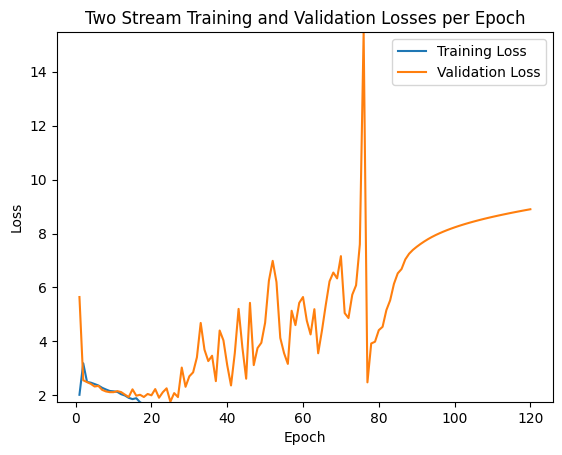

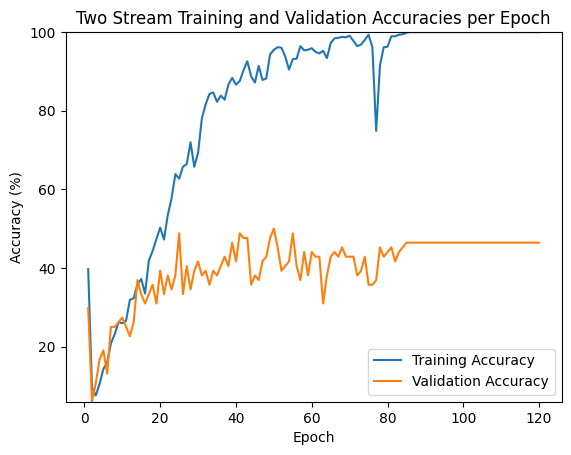

In [ ]:
plot_losses(optical_flow_model_result, "Two Stream")
plot_accuracies(optical_flow_model_result, "Two Stream")

In [ ]:
two_stream_net = TwoStreamNet(device).to(device)

# Optionally: Load training results into models or perform training here

# Define model names and collect them into a list
model_names = ["FrameNet", "OpticalFlow", "TwoStreamNet"]
models = [frame_net, optical_flow, two_stream_net]

# Save models' state dictionaries with their names
torch.save({
    model_names[0]: models[0].state_dict(),
    model_names[1]: models[1].state_dict(),
    model_names[2]: models[2].state_dict()
}, "models.pth")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NameError: name 'frame_net' is not defined